In [1]:
%cd /content/drive/MyDrive/multi/0426

/content/drive/MyDrive/multi/0426


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 단순 선형 회귀 - 당뇨병 사례

In [3]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [4]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


- 10개의 feature와 target간의 상관관계도

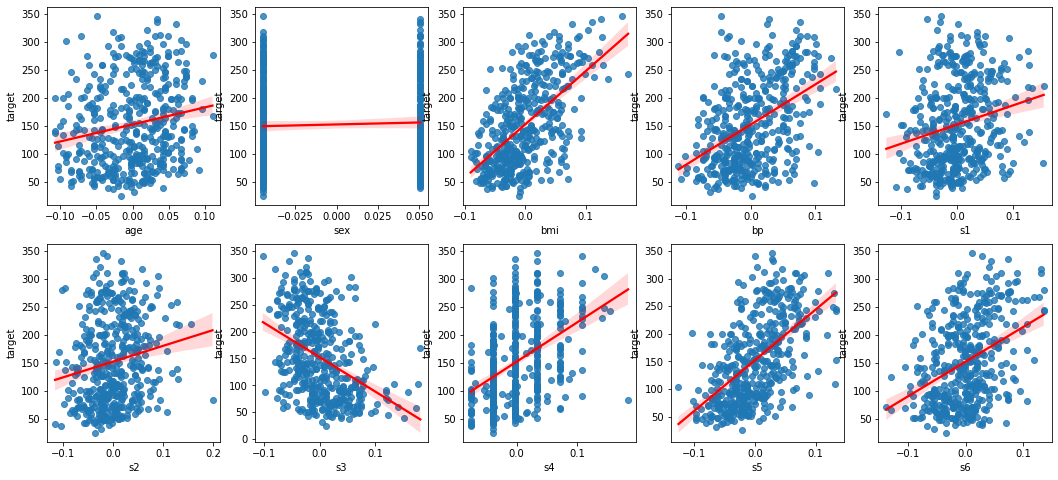

In [8]:
import seaborn as sns
_, ax = plt.subplots(2,5,figsize=(18,8))

for i, feature in enumerate(df.columns[:-1]):
    r = i // 5; c = i % 5
    sns.regplot(x=feature, y='target', data=df, line_kws={'color':'red'}, ax = ax[r, c])

plt.show()

- feature vs target

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [10]:
for feature in df.columns[:-1]:
    X = df[feature].values.reshape(-1,1)
    lr.fit(X, diabetes.target)
    score = lr.score(X, diabetes.target)
    print(f'{feature} : {score:.4f}')


age : 0.0353
sex : 0.0019
bmi : 0.3439
bp : 0.1949
s1 : 0.0450
s2 : 0.0303
s3 : 0.1559
s4 : 0.1853
s5 : 0.3202
s6 : 0.1463


### BMI vs target
- train/test dataset 분리(test_size=0.1)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.bmi.values.reshape(-1,1),
     diabetes.target, 
     test_size=0.1,
     random_state=2022
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((397, 1), (45, 1), (397,), (45,))

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
lr.coef_, lr.intercept_ ,lr._residues

(array([939.55896022]), 151.79247763803028, 1578990.0125372214)

In [21]:
from sklearn.metrics import r2_score

pred = lr.predict(X_test)
r2_score(y_test, pred)

0.46955604545525564

In [22]:
lr.score(X_test, y_test)

0.46955604545525564

In [24]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, pred)
print(mse) # MSE
print(np.sqrt(mse)) # RMSE

3127.5719491232653
55.92469891848561


- 시각화

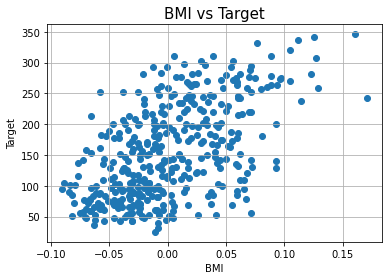

In [25]:
plt.scatter(X_train, y_train)
plt.grid()
plt.xlabel('BMI')
plt.ylabel('Target')
plt.title('BMI vs Target', fontsize=15)
plt.show()

In [27]:
xs = np.array([-0.1, 0.18])
ys = xs * lr.coef_ + lr.intercept_
ys

array([ 57.83658162, 320.91309048])

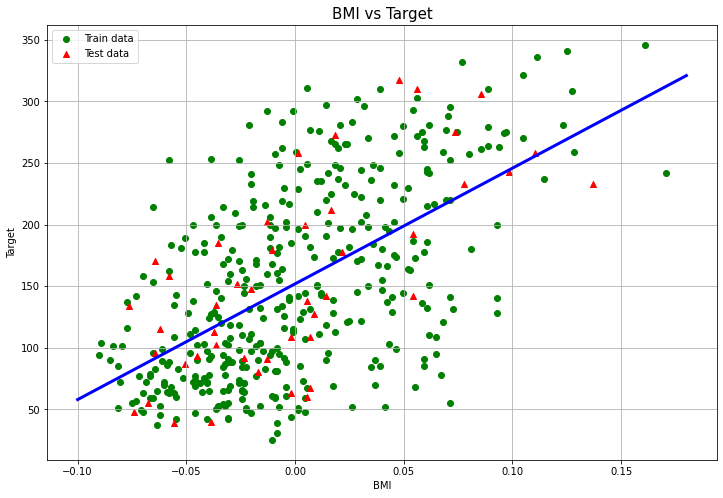

In [35]:
plt.figure(figsize=(12,8))
plt.scatter(X_train, y_train, color='green', label='Train data')
plt.scatter(X_test, y_test, color='red', marker='^',label='Test data')
plt.plot(xs, ys, 'b-', lw=3)
plt.grid()
plt.xlabel('BMI')
plt.ylabel('Target')
plt.title('BMI vs Target', fontsize=15)
plt.legend()
plt.show()

### BP vs target

In [40]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df.bp.values.reshape(-1,1), diabetes.target, test_size=0.1, random_state=2022
)

In [46]:
lr2 = LinearRegression()
lr2.fit(X_train2, y_train2)

pred2 = lr2.predict(X_test2)

#SSR값이 SST값보다 클 때 발생한다.
#이는 모델이 평균값으로 예측하는 것보다 정확하지 않을 때 발생한다.
r2_score(y_test2, pred2)

-0.03530048843589517

In [47]:
mean_squared_error(y_test, pred), mean_squared_error(y_test2, pred2)

(3127.5719491232653, 6104.276877516169)